<a href="https://colab.research.google.com/github/kaido-kimono/Demo/blob/master/image_classification_with_cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre d'exemples pour entrainer : 60000
Nombre d'exemples pour le test : 10000


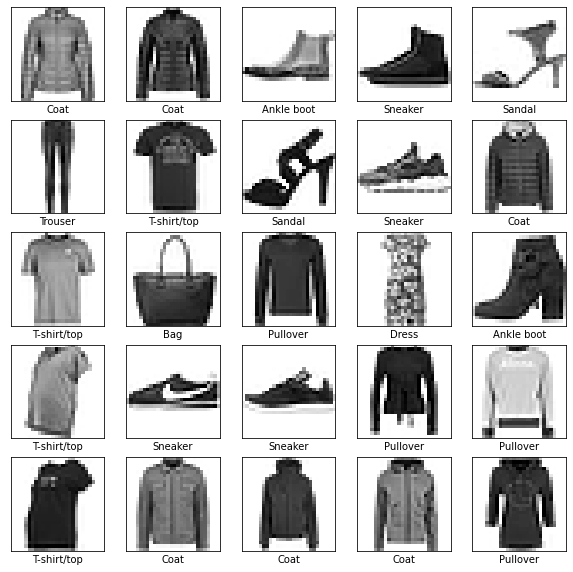

Epoch 1/5
1875/1875 [==============================] - 72s 39ms/step - loss: 0.3909 - accuracy: 0.8588
Epoch 2/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2608 - accuracy: 0.9049
Epoch 3/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2121 - accuracy: 0.9234
Epoch 4/5
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1770 - accuracy: 0.9347
Epoch 5/5
313/313 [==============================] - 6s 18ms/step - loss: 0.2496 - accuracy: 0.9159
la précision sur le test est de : 0.9158999919891357


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:160: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


(28, 28, 1)
(1, 28, 28, 1)
[[4.32568822e-06 7.94601860e-08 4.36428422e-03 7.33352010e-08
  9.71392453e-01 2.56424548e-09 2.42378525e-02 2.49776022e-09
  1.05653854e-07 9.13203735e-07]]


4

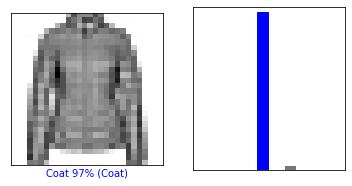

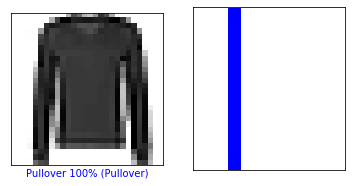

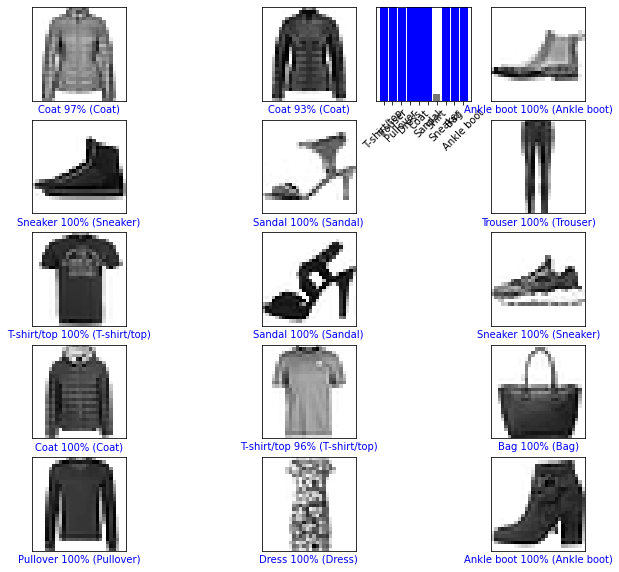

In [2]:
import tensorflow as tf
# Import TensorFlow Dataset
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

import logging 
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Import Fashion MINST dataset
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

# Setting class_name
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Exploring data 
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Nombre d'exemples pour entrainer : {}".format(num_train_examples))
print("Nombre d'exemples pour le test : {}".format(num_test_examples))

# converting images range from [0,255] to [0,1] for normalization
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

# Showing data
#for image, label in test_dataset.take(1):
 # break
#image = image.numpy().reshape((28,28))

#plt.figure()
#plt.imshow(image, cmap=plt.cm.binary)
#plt.colorbar()
#plt.gird(False)
#plt.show()

# Displaying first 25 images of the training dataset
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    #plt.gird(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_name[label])
    i += 1
plt.show()

# Building our model
model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                             input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D((2, 2), strides=2),
      tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
      tf.keras.layers.MaxPooling2D((2,2), strides=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('la précision sur le test est de :', test_accuracy)

for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

predictions.shape

predictions[0]

a = np.argmax(predictions[0])

test_labels[a]

def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i],images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                       100*np.max(predictions_array),
                                       class_name[true_label]),
                                       color=color)
  

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
#  plt.gird(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

i = 12 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*1+2)
  plot_value_array(i, predictions, test_labels)

img = test_images[0]

print(img.shape)

img = np.array([img])

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_name, rotation=45)

np.argmax(predictions_single[0])

